<a href="https://colab.research.google.com/github/behrangEhi/ML-DL-Projects/blob/main/ParallelProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Point Operators**

In [ ]:
import numpy as np

g_max = 255
g_min = 0

img = np.array([[153, 153, 153, 149, 164, 148,30],
                [153, 153, 152, 147, 162, 144,40],
                [152, 152, 152, 125, 125, 92,180],
                [49, 56,  57, 79,  90,  99,80],
                [43, 52,  56, 85,  98, 101,30],
                [183, 49,  57, 99, 101, 106,200]])
t_min = img.min();
t_max = img.max();

def normalized(intensity):
  iI = intensity
  g_min= 0
  g_max= 255
  iO = (iI-t_min)*(((g_max-g_min)/(t_max-t_min))+g_min)
  return round(iO, 0)

rows , columns = img.shape;
points = np.zeros(img.shape, np.uint8)

for j in range(columns):
  for i in range(rows):
    points[i][j] =  normalized(img[i][j])
print("The points are : \n", points)

The points are : 
 [[184 184 184 178 201 177   0]
 [184 184 183 176 198 171  15]
 [183 183 183 142 142  93 225]
 [ 28  39  40  74  90 104  75]
 [ 20  33  39  82 102 106   0]
 [230  28  40 104 106 114 255]]


# **Local sum and average**

In [ ]:
import numpy as np

img = np.array([[153, 153, 153, 149, 164, 148,30],
                [153, 153, 152, 147, 162, 144,40],
                [152, 152, 152, 125, 125, 92,180],
                [49, 56,  57, 79,  90,  99,80],
                [43, 52,  56, 85,  98, 101,30],
                [183, 49,  57, 99, 101, 106,200]])

img_height, img_width= img.shape
def sum_3x3(i,j):
  res = img[i,j] + img[i,j-1] + img[i,j+1]
  res = res + img[i+1,j-1] + img[i+1,j+1]
  res = res + img[i-1,j-1] + img[i-1,j+1]
  res = res + img[i-1,j] + img[i+1,j]
  return res

print(f"sum_3x3(3,3) = {sum_3x3(3,3)}")

def  average_3x3(i,j):
  return round(sum_3x3(i,j)/9, 4)
print(f"img[3][3] = {img[3][3]} and average_3x3 is {average_3x3(3,3)}")

sum_3x3(3,3) = 867
img[3][3] = 79 and average_3x3 is 96.3333


# **Fast-Median**

In [ ]:
import statistics
import numpy as np

def median_3x3fast(i,j):
  a = statistics.median([img[i-1,j-1], img[i-1,j], img[i-1, j+1]])
  b = statistics.median([img[i,j-1], img[i,j], img[i, j+1]])
  c = statistics.median([img[i+1,j-1], img[i+1,j], img[i+1, j+1]])
  median = statistics.median([a,b,c])
  return median
print(f"Fast median img[3][3] = {median_3x3fast(3,3)}")

img = np.array([[153, 153, 153, 149, 164, 148,30],
                [153, 153, 152, 147, 162, 144,40],
                [152, 152, 152, 125, 125,  92,30],
                [ 49,  56,  57, 79,  90,  99,30],
                [ 43,  52,  56, 85,  98, 101,30],
                [183,  49,  57, 99, 101, 106,30]])

print(f"Median img[3][3] = {statistics.median([152, 125, 125,57, 79,  90,56, 85,  98, ])}")

Fast median img[3][3] = 85
Median img[3][3] = 90


# **Dithering**

In [ ]:
import numpy as np

img = np.array([[153, 153, 153, 149, 164, 148,30],
                [153, 153, 152, 147, 162, 144,40],
                [152, 152, 152, 125, 125, 92,180],
                [49, 56,  57, 79,  90,  99,80],
                [43, 52,  56, 85,  98, 101,30],
                [183, 49,  57, 99, 101, 106,200]])

g_white = 255
g_black = 0
b_black = True
b_white = False
thres = g_white/5

def dither_order(i,j):
  if  i%2 or j%2 :
    res = img[i][j] < thres
    send_right =  img[i][j] < 3*thres
    send_down = img[i][j] < 4*thres
    send_down_r = img[i][j] < 2*thres
  return res

print(f"dither_order(3,3) for img[3][3] = 79 is { dither_order(3,3)}")


dither_order(3,3) for img[3][3] = 79 is False


# **Edge Detection**

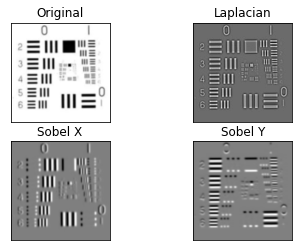

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# loading image
img0 = cv2.imread('pic4.JPG',)

# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

## **introduction**

output pixel value = 174.91712323268982


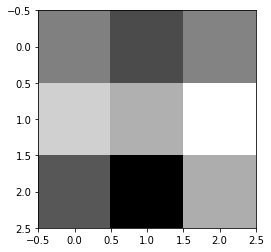

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example of a grayscale image patch
A = np.array([[119, 80, 122], [177, 154, 212], [89, 25, 152]])
plt.imshow(A, cmap=plt.get_cmap('gray'))

# Next we define the matrices associated with the Sobel filter
Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])

# The output of the kernel operation is given by the following
GxA, GyA = np.sum(np.multiply(Gx, A)), np.sum(np.multiply(Gy, A))
output_value = np.sqrt(GxA**2 + GyA**2)  # equal to the "hypotenuse" of the values in the x and y directions
print("output pixel value =", output_value)

## **sobel_from_scratch**

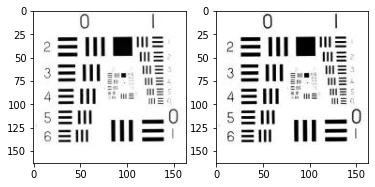

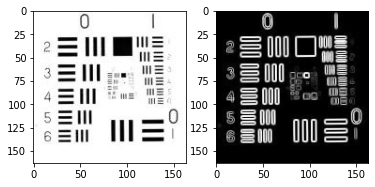

In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

# #---------------------------------------------------------------------------------------------------------------------
# PART I - Transforming an image from color to grayscale
# #---------------------------------------------------------------------------------------------------------------------

# Here we import the image file as an array of shape (nx, ny, nz)
image_file = 'pic4.JPG'
input_image = imread(image_file)  # this is the array representation of the input image
[nx, ny, nz] = np.shape(input_image)  # nx: height, ny: width, nz: colors (RGB)

# Extracting each one of the RGB components
r_img, g_img, b_img = input_image[:, :, 0], input_image[:, :, 1], input_image[:, :, 2]

# The following operation will take weights and parameters to convert the color image to grayscale
gamma = 1.400  # a parameter
r_const, g_const, b_const = 0.2126, 0.7152, 0.0722  # weights for the RGB components respectively
grayscale_image = r_const * r_img ** gamma + g_const * g_img ** gamma + b_const * b_img ** gamma

# This command will display the grayscale image alongside the original image
fig1 = plt.figure(1)
ax1, ax2 = fig1.add_subplot(121), fig1.add_subplot(122)
ax1.imshow(input_image)
ax2.imshow(grayscale_image, cmap=plt.get_cmap('gray'))
fig1.show()

# #---------------------------------------------------------------------------------------------------------------------
# PART II - Applying the Sobel operator
# #---------------------------------------------------------------------------------------------------------------------

"""
The kernels Gx and Gy can be thought of as a differential operation in the "input_image" array in the directions x and y
respectively. These kernels are represented by the following matrices:
      _               _                   _                _
     |                 |                 |                  |
     | 1.0   0.0  -1.0 |                 |  1.0   2.0   1.0 |
Gx = | 2.0   0.0  -2.0 |    and     Gy = |  0.0   0.0   0.0 |
     | 1.0   0.0  -1.0 |                 | -1.0  -2.0  -1.0 |
     |_               _|                 |_                _|
"""

# Here we define the matrices associated with the Sobel filter
Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
[rows, columns] = np.shape(grayscale_image)  # we need to know the shape of the input grayscale image
sobel_filtered_image = np.zeros(shape=(rows, columns))  # initialization of the output image array (all elements are 0)

# Now we "sweep" the image in both x and y directions and compute the output
for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Gx, grayscale_image[i:i + 3, j:j + 3]))  # x direction
        gy = np.sum(np.multiply(Gy, grayscale_image[i:i + 3, j:j + 3]))  # y direction
        sobel_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)  # calculate the "hypotenuse"

# Display the original image and the Sobel filtered image
fig2 = plt.figure(2)
ax1, ax2 = fig2.add_subplot(121), fig2.add_subplot(122)
ax1.imshow(input_image)
ax2.imshow(sobel_filtered_image, cmap=plt.get_cmap('gray'))
fig2.show()

# **Morphologic Operators**

## **Erosion and Dilation**

In [ ]:
import numpy as np

img_binary = np.array([[0, 0, 0, 0, 0, 0, 1],
                      [0, 0, 0, 0, 0, 1, 1],
                      [0, 0, 0, 1, 1, 1, 1],
                      [1, 1, 1, 1, 1, 1, 1],
                      [1, 1, 1, 1, 1, 0, 0],
                      [0, 1, 1, 1, 0, 0, 1]])
def eroison(i, j):
  res = img_binary[i][j] and img_binary[i][j-1] and img_binary[i][j+1]
  res = res and img_binary[i-1][j] and img_binary[i-1][j-1] and img_binary[i-1][j+1]
  res = res and img_binary[i+1][j] and img_binary[i+1][j-1] and img_binary[i+1][j+1]
  return res

print(f"Erision function for img_binary[4][2] equal to : {eroison(4, 2)}")

def dilation(i, j):
  res = img_binary[i][j] or img_binary[i][j-1] or img_binary[i][j+1]
  res = res or img_binary[i-1][j] or img_binary[i-1][j-1] or img_binary[i-1][j+1]
  res = res or img_binary[i+1][j] or img_binary[i+1][j-1] or img_binary[i+1][j+1]
  return res

print(f"Dilation function for img_binary[1][1] equal to : {dilation(1, 1)}")

erision function for img_binary[4][2] equal to : 1
dilation function for img_binary[1][1] equal to : 0


## **Open and Close**

In [ ]:
import numpy as np

img_binary_open = np.copy(img_binary)
img_binary_close = np.copy(img_binary)

def open(i, j):
  img_binary_open[i][j] = eroison(i, j)
  print(f"After eroison for [2][5] :\n {img_binary_open}")
  return dilation(i, j)

print(f"Before eroison for [2][5] :\n {img_binary_open}")
print(f"Open for [2][5] : {open(2, 5)}")

def close(i, j):
  img_binary_close[i][j] = dilation(i, j)
  print(f"After dilation for [2][5] :\n {img_binary_close}")
  return eroison(i, j)

print(f"\nBefore dilation for [2][5] :\n {img_binary_close}")
print(f"close for [2][5] : {open(2, 5)}")

Before eroison for [2][5] :
 [[0 0 0 0 0 0 1]
 [0 0 0 0 0 1 1]
 [0 0 0 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 0 0]
 [0 1 1 1 0 0 1]]
After eroison for [2][5] :
 [[0 0 0 0 0 0 1]
 [0 0 0 0 0 1 1]
 [0 0 0 1 1 0 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 0 0]
 [0 1 1 1 0 0 1]]
Open for [2][5] : 1

Before dilation for [2][5] :
 [[0 0 0 0 0 0 1]
 [0 0 0 0 0 1 1]
 [0 0 0 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 0 0]
 [0 1 1 1 0 0 1]]
After eroison for [2][5] :
 [[0 0 0 0 0 0 1]
 [0 0 0 0 0 1 1]
 [0 0 0 1 1 0 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 0 0]
 [0 1 1 1 0 0 1]]
close for [2][5] : 1


# **Flood Fill Algorithm**

In [ ]:
import random

def flood_recursive(matrix):
    width = len(matrix)
    height = len(matrix[0])
    def fill(x,y,start_color,color_to_update):
        #if the square is not the same color as the starting point
        if matrix[x][y] != start_color:
            return
        #if the square is not the new color
        elif matrix[x][y] == color_to_update:
            return
        else:
            #update the color of the current square to the replacement color
            matrix[x][y] = color_to_update
            neighbors = [(x-1,y),(x+1,y),(x-1,y-1),(x+1,y+1),(x-1,y+1),(x+1,y-1),(x,y-1),(x,y+1)]
            for n in neighbors:
                if 0 <= n[0] <= width-1 and 0 <= n[1] <= height-1:
                    fill(n[0],n[1],start_color,color_to_update)
    #pick a random starting point
    start_x = random.randint(0,width-1)
    start_y = random.randint(0,height-1)
    start_color = matrix[start_x][start_y]
    fill(start_x,start_y,start_color,9)
    return matrix

img_test = np.array([
                [153, 153, 153, 149, 164, 148,30],
                [153, 153, 152, 147, 162, 144,40],
                [152, 152, 152, 125, 125,  92,30],
                [ 49,  56,  57, 79,  90,  99,30],
                [ 43,  52,  56, 85,  98, 101,30],
                [183,  49,  57, 99, 101, 106,30]])

print(flood_recursive(img_test))

[[153 153 153 149 164 148  30]
 [153 153 152 147 162 144  40]
 [152 152 152 125 125  92  30]
 [ 49  56  57  79  90  99  30]
 [ 43  52  56  85  98   9  30]
 [183  49  57  99   9 106  30]]


# **Boundary**

In [ ]:
import numpy as np

img_binary_boundary = np.array([
                      [0, 0, 0, 0, 0, 0, 1],
                      [0, 1, 0, 0, 1, 1, 1],
                      [0, 0, 0, 1, 1, 0, 1],
                      [1, 1, 1, 1, 1, 1, 1],
                      [1, 1, 1, 1, 1, 0, 0],
                      [0, 1, 1, 1, 0, 0, 1]])

def boundary(i, j):
  return img_binary_boundary[i][j] and int(not eroison(i, j))

print(f"boundary func for img_binary_boundary[2][5] : {boundary(2, 5)}")
print(f"boundary func for img_binary_boundary[1][4] : {boundary(1, 4)}")


boundary func for img_binary_boundary[2][5] : 0
boundary func for img_binary_boundary[1][4] : 1


# **Skeleton**

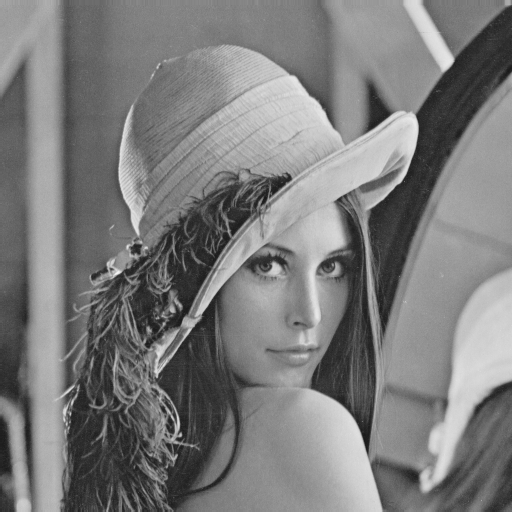

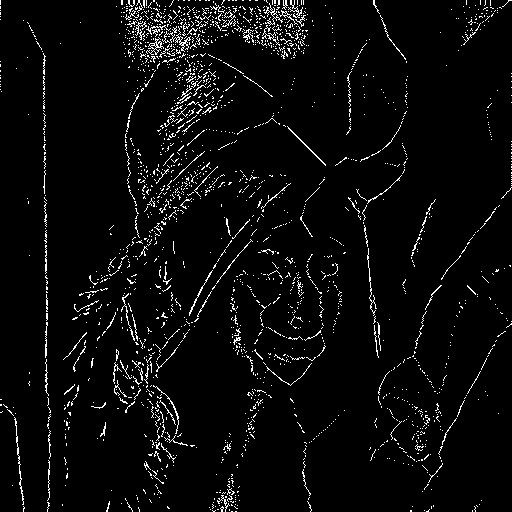

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read the image as a grayscale image
img = cv2.imread('pic3.png', 0)
cv2_imshow(img)

# Threshold the image
ret,img = cv2.threshold(img, 127, 255, 0)

# Step 1: Create an empty skeleton
size = np.size(img)
skel = np.zeros(img.shape, np.uint8)

# Get a Cross Shaped Kernel
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

# Repeat steps 2-4
while True:
    #Step 2: Open the image
    open = cv2.morphologyEx(img, cv2.MORPH_OPEN, element)
    #Step 3: Substract open from the original image
    temp = cv2.subtract(img, open)
    #Step 4: Erode the original image and refine the skeleton
    eroded = cv2.erode(img, element)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
    # Step 5: If there are no white pixels left ie.. the image has been completely eroded, quit the loop
    if cv2.countNonZero(img)==0:
        break

# Displaying the final skeleton
cv2_imshow(skel)